CASE STUDY (Mcdonalds)

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sb

In [36]:
dataset=pd.read_csv("mcdonalds.csv")
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [37]:
dataset.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
categorical=[]
continuous=[]
for i in dataset:
    if(dataset[i].dtypes=="object"):
        categorical.append(i)
    else:
        continuous.append(i)

In [40]:
categorical

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'VisitFrequency',
 'Gender']

In [41]:
continuous

['Age']

In [42]:
y=dataset[["tasty"]]
x=dataset.drop(labels=["tasty"],axis=1)

In [43]:
dataset.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

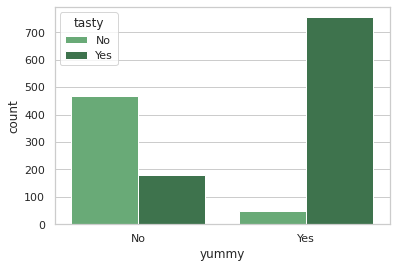

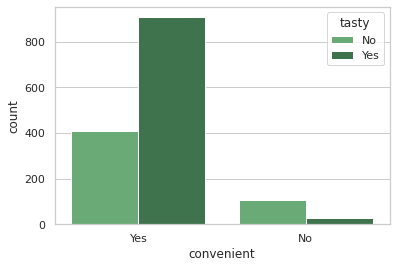

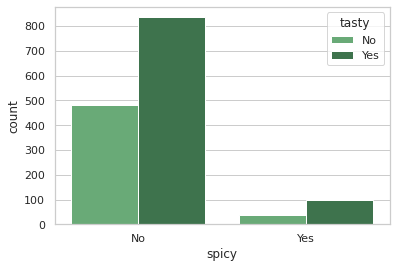

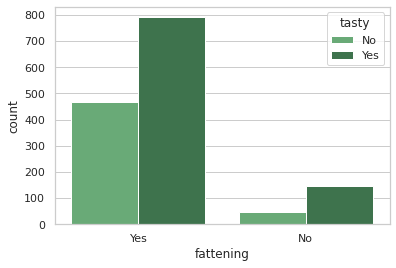

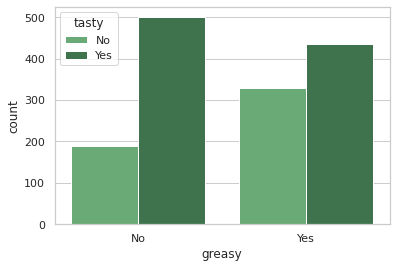

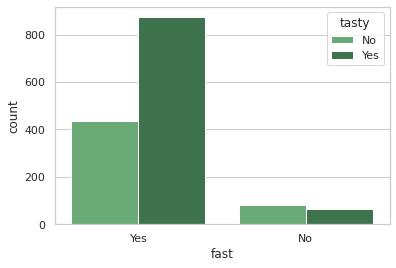

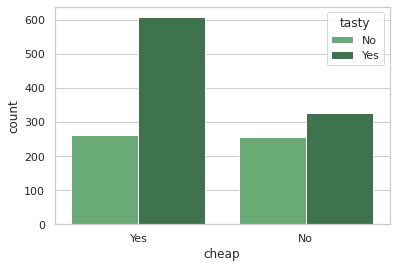

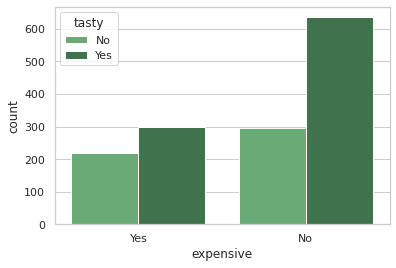

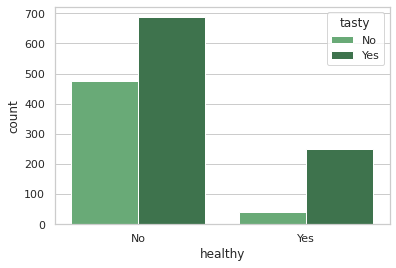

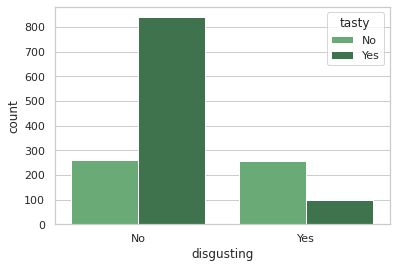

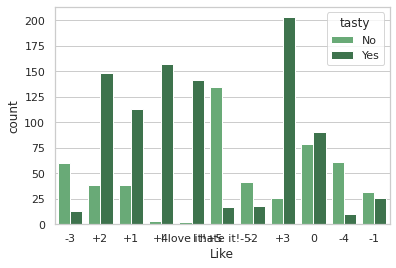

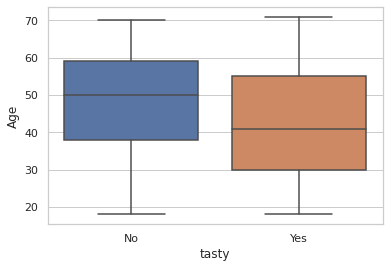

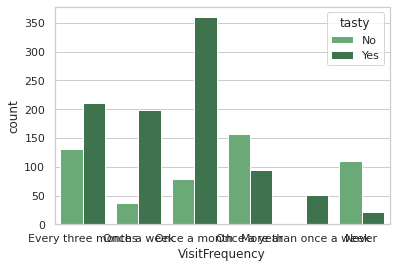

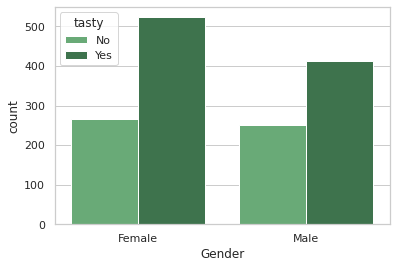

In [44]:
from warnings import filterwarnings
filterwarnings("ignore")
sns.set(style="whitegrid", color_codes = True)
for i in x.columns:
    if(x[i].dtypes=="object"):
        sns.countplot(x[i],hue=y.tasty, palette="Greens_d")
        plt.show()
    else:
        sns.boxplot(y.tasty,x[i])
        plt.show()

In [45]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)

In [46]:
kmeans_model.fit(dataset[['Age']])

KMeans(max_iter=400, random_state=42)

In [47]:
def try_different_clusters(K, data):
       
    cluster_values = list(range(1, K+1))
    inertias=[]
    
    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)
    
    return inertias

In [48]:
outputs = try_different_clusters(12,dataset[['Age']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

In [49]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),                  
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances")
                  
figure.show()

In [50]:
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(dataset[['Age']])

array([0, 4, 0, ..., 4, 2, 3], dtype=int32)

In [51]:
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

array([[3.79443615e+27, 6.35033333e+01],
       [2.85991357e+10, 2.40766423e+01],
       [1.24196549e+19, 4.39658120e+01],
       [1.05959872e+15, 3.45966667e+01],
       [1.91963884e+23, 5.36115942e+01]])

# New section